In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("creditcard.csv")
df.head() # View first 5 rows of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np

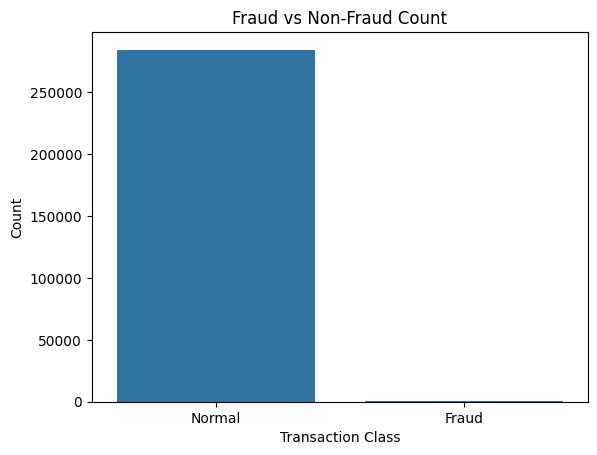

In [ ]:
sns.countplot(data= df, x = "Class")
plt.xticks([0,1], ["Normal", "Fraud"])
plt.xlabel("Transaction Class")
plt.ylabel("Count")
plt.title("Fraud vs Non-Fraud Count")
plt.show()

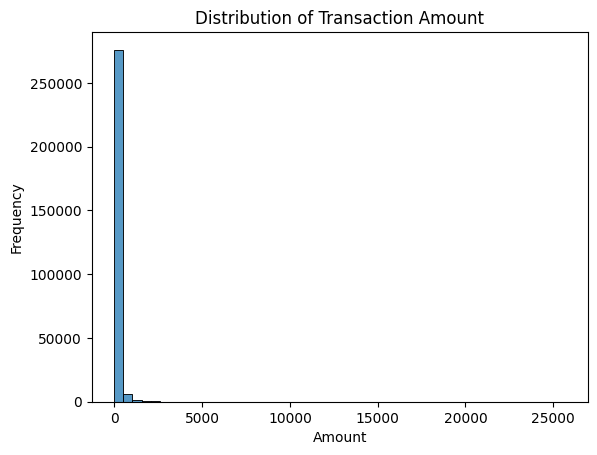

In [ ]:
sns.histplot(data= df, x="Amount", bins=50)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

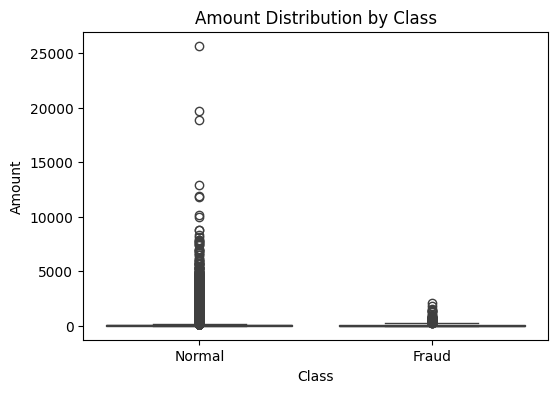

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.xticks([0,1], ['Normal', 'Fraud'])
plt.title("Amount Distribution by Class")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

                      Model  Precision    Recall   ROC-AUC
0       Logistic Regression   0.044739  0.928571  0.982904
1  Random Forest Classifier   0.921053  0.714286  0.947694


In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28, stratify= y)

In [ ]:
scaler = StandardScaler()
X_train[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])
X_test[['Amount', 'Time']]  = scaler.transform(X_test[['Amount', 'Time']])

In [ ]:
models = {"Logistic Regression": LogisticRegression(class_weight="balanced"), # baseline model
          "Random Forest Classifier": RandomForestClassifier(class_weight="balanced")} # To uncover non-linear patters

In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

                      Model  Precision    Recall   ROC-AUC
0       Logistic Regression   0.063830  0.918367  0.983961
1  Random Forest Classifier   0.921053  0.714286  0.957840


In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score

In [ ]:
param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_leaf": [1, 2, 4],
    "class_weight": ['balanced']
}

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
search = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    scoring='recall',  # prioritize catching fraud
    cv=3,
    n_iter=10,
    n_jobs=-1,
    verbose=1
)

In [ ]:
search.fit(X_train, y_train)
best_rf = search.best_estimator_
print("Best RF Parameters:", search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best RF Parameters: {'n_estimators': 100, 'min_samples_leaf': 1, 'max_depth': 10, 'class_weight': 'balanced'}


In [ ]:
y_prob = best_rf.predict_proba(X_test)[:, 1] # type: ignore



In [ ]:
thresholds = np.arange(0.1, 0.9, 0.1)
results = []



In [ ]:
for t in thresholds:
    y_pred = (y_prob >= t).astype(int)
    results.append({
        "Threshold": t,
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    })

In [ ]:
threshold_df = pd.DataFrame(results)
print(threshold_df)

   Threshold  Precision    Recall        F1
0        0.1   0.154255  0.887755  0.262840
1        0.2   0.545455  0.857143  0.666667
2        0.3   0.770642  0.857143  0.811594
3        0.4   0.833333  0.816327  0.824742
4        0.5   0.865169  0.785714  0.823529
5        0.6   0.860465  0.755102  0.804348
6        0.7   0.875000  0.714286  0.786517
7        0.8   0.881579  0.683673  0.770115


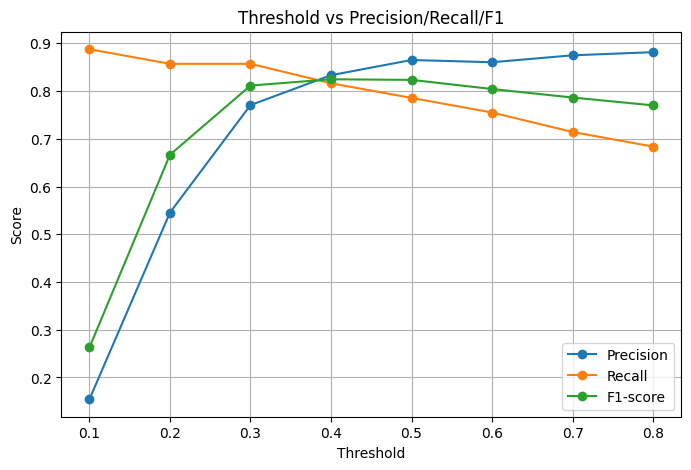

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(threshold_df["Threshold"], threshold_df["Precision"], marker='o', label="Precision")
plt.plot(threshold_df["Threshold"], threshold_df["Recall"], marker='o', label="Recall")
plt.plot(threshold_df["Threshold"], threshold_df["F1"], marker='o', label="F1-score")

plt.title("Threshold vs Precision/Recall/F1")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
final_threshold = 0.4
y_pred_final = (y_prob >= final_threshold).astype(int)

In [ ]:
# Metrics
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)
roc_auc = roc_auc_score(y_test, y_prob)

In [ ]:
print(
    f"Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}, ROC-AUC: {roc_auc:.3f}"
)

Precision: 0.833, Recall: 0.816, F1: 0.825, ROC-AUC: 0.976


In [ ]:
with open("best_rf_model.pkl", "wb") as f:
    pickle.dump(best_rf, f)

In [ ]:
# Save the scaler
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']